<a href="https://colab.research.google.com/github/JacobyNevada/ds_belhard/blob/main/hw5/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Unnamed: 0      Area            Item  Year  hg/ha_yield  \
0               0   Albania           Maize  1990        36613   
1               1   Albania        Potatoes  1990        66667   
2               2   Albania     Rice, paddy  1990        23333   
3               3   Albania         Sorghum  1990        12500   
4               4   Albania        Soybeans  1990         7000   
...           ...       ...             ...   ...          ...   
28237       28237  Zimbabwe     Rice, paddy  2013        22581   
28238       28238  Zimbabwe         Sorghum  2013         3066   
28239       28239  Zimbabwe        Soybeans  2013        13142   
28240       28240  Zimbabwe  Sweet potatoes  2013        22222   
28241       28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2  

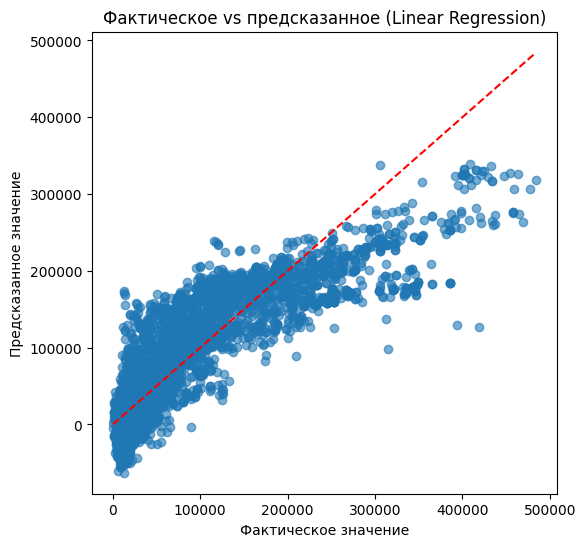


 Random Forest
MSE:  79783324.08
RMSE: 8932.15
MAE:  3216.26
R²:   0.989


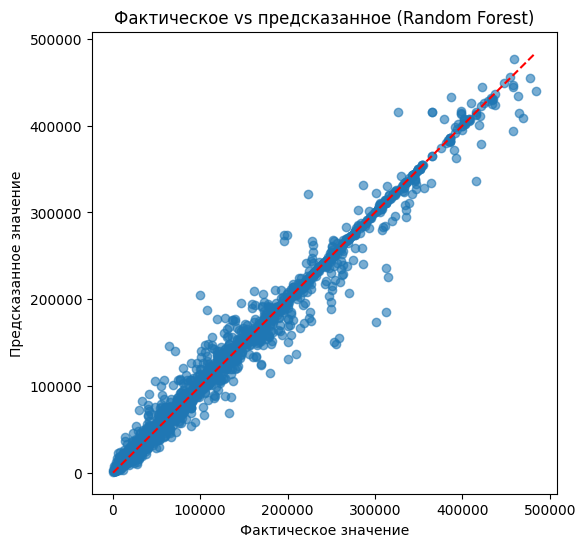


 Gradient Boosting
MSE:  826438313.79
RMSE: 28747.84
MAE:  18286.32
R²:   0.886


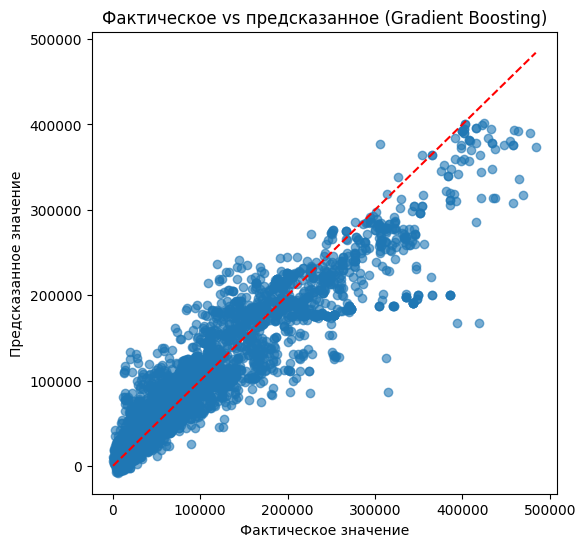


 XGBoost
MSE:  482506496.00
RMSE: 21966.03
MAE:  13503.42
R²:   0.933


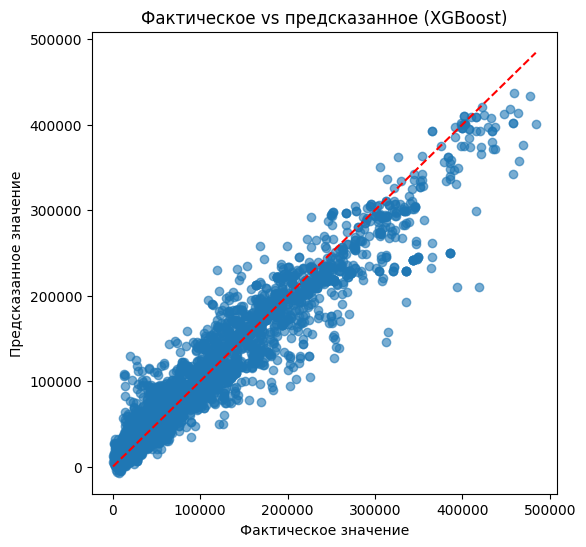


 Extra Trees
MSE:  58168604.28
RMSE: 7626.83
MAE:  2430.99
R²:   0.992


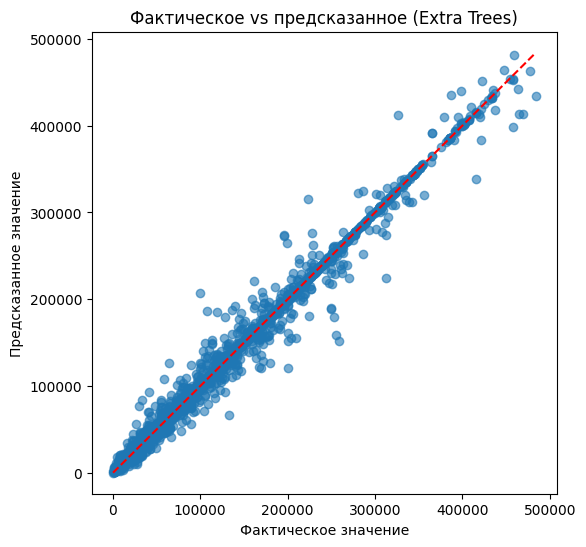


 Linear Regression
MSE:  431.60
RMSE: 20.77
MAE:  16.34
R²:   0.376


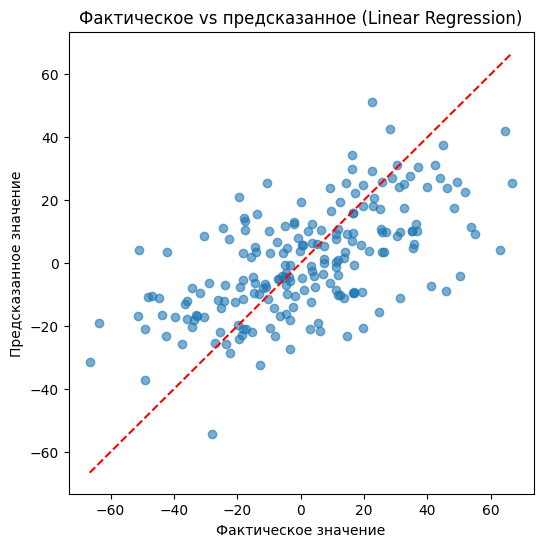


 Random Forest
MSE:  657.61
RMSE: 25.64
MAE:  20.06
R²:   0.049


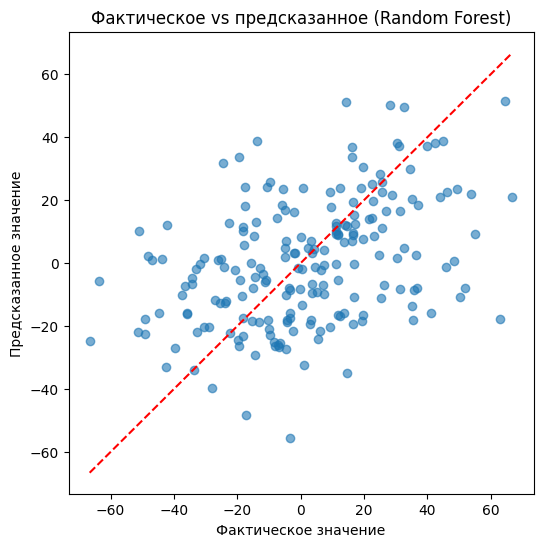


 Gradient Boosting
MSE:  526.97
RMSE: 22.96
MAE:  18.13
R²:   0.238


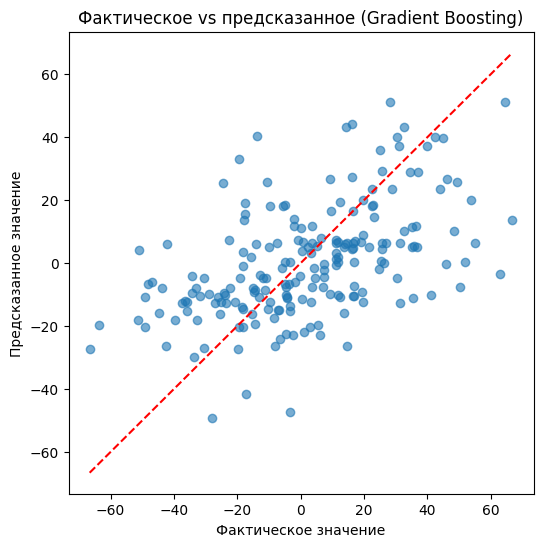


 XGBoost
MSE:  533.97
RMSE: 23.11
MAE:  18.09
R²:   0.228


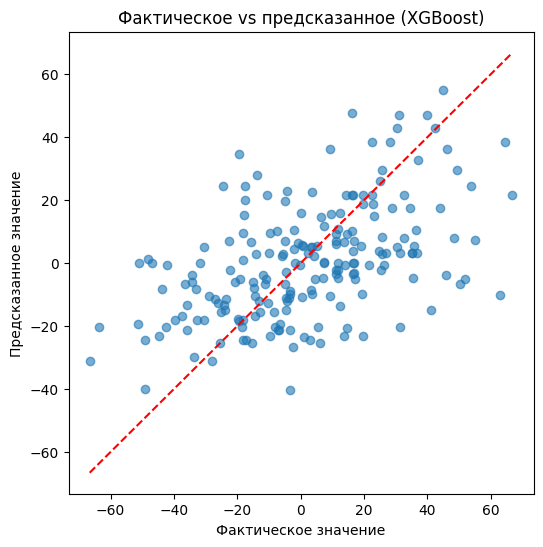


 Extra Trees
MSE:  779.53
RMSE: 27.92
MAE:  22.20
R²:   -0.128


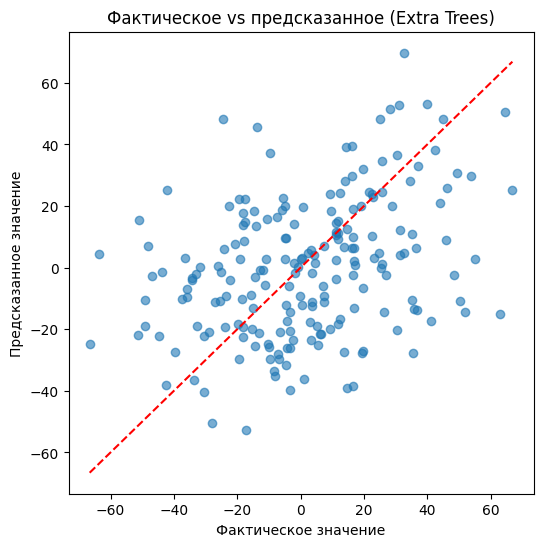

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

def evaluate_regression(X, y, model, model_name,):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n {model_name}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"R²:   {r2:.3f}")

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        color="red",
        linestyle="--"
    )
    plt.xlabel("Фактическое значение")
    plt.ylabel("Предсказанное значение")
    plt.title(f"Фактическое vs предсказанное ({model_name})")
    plt.show()

##############################################3
# https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset
df = pd.read_csv("yield_df.csv")

print(df)

df_encoded = pd.get_dummies(df, columns=["Area", "Item"], drop_first=True)
X = df_encoded.drop(columns=["hg/ha_yield"])
y = df_encoded["hg/ha_yield"]

evaluate_regression(X, y, LinearRegression(), "Linear Regression")
evaluate_regression(X, y, RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1), "Random Forest")
evaluate_regression(X, y, GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42), "Gradient Boosting")
evaluate_regression(X, y, XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42, n_jobs=-1), "XGBoost")
evaluate_regression(X, y, ExtraTreesRegressor(n_estimators=200, random_state=42, n_jobs=-1), "Extra Trees")


# Генерация искусственного датасета
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)

evaluate_regression(X, y, LinearRegression(), "Linear Regression")
evaluate_regression(X, y, RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1), "Random Forest")
evaluate_regression(X, y, GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42), "Gradient Boosting")
evaluate_regression(X, y, XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42, n_jobs=-1), "XGBoost")
evaluate_regression(X, y, ExtraTreesRegressor(n_estimators=200, random_state=42, n_jobs=-1), "Extra Trees")

Лучше всего себя показал **Extra Trees**. На втором месте Random Forest, у него чуть хуже точность и он дольше работает